<a href="https://colab.research.google.com/github/Richahaha/Travelinsurance/blob/main/TravelInsurancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


travel_insurance = pd.read_csv('https://raw.githubusercontent.com/Richahaha/Travelinsurance/main/TravelInsurancePrediction.csv')
travel_insurance.rename(columns={'Employment_Type': 'EmploymentType'}, inplace=True)
travel_insurance['AnnualIncome'] = travel_insurance['AnnualIncome']/100000
travel_insurance



,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,4.0,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,12.5,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,5.0,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,7.0,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,7.0,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,15.0,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,17.5,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,11.5,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,10.0,6,0,Yes,Yes,1


In [ ]:
# Calculate the proportion of customers who made a purchase

proportion_purchases = travel_insurance['TravelInsurance'].mean()
print("Proportion of purchases:", proportion_purchases)


Proportion of purchases: 0.3573225968797182


In [ ]:
# Build a binary logistic regression model using all the variables in the training data

logistic_model = sm.Logit.from_formula('TravelInsurance ~ Age + C(EmploymentType) + C(GraduateOrNot) + AnnualIncome + FamilyMembers + ChronicDiseases + C(FrequentFlyer) + C(EverTravelledAbroad)', data=travel_insurance).fit()
print(logistic_model.summary())


Optimization terminated successfully.
         Current function value: 0.520462
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1987
Model:                          Logit   Df Residuals:                     1978
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.2016
Time:                        03:54:03   Log-Likelihood:                -1034.2
converged:                       True   LL-Null:                       -1295.3
Covariance Type:            nonrobust   LLR p-value:                1.219e-107
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                     

In [ ]:
# construct a confusion matrix
y_pred = logistic_model.predict(travel_insurance)
y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Creating the confusion matrix
cm = confusion_matrix(travel_insurance['TravelInsurance'], y_pred)

# Formatting the confusion matrix as a table
confusion_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0 ', 'Actual 1'])

print("Confusion Matrix:")
print(confusion_df)

Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0          1183           94
Actual 1           359          351


In [ ]:
# Predicting the dependent variable
y_pred = logistic_model.predict(travel_insurance)
y_pred = (y_pred >= 0.5).astype(int) # Convert probabilities to binary predictions

# Creating the confusion matrix
cm = confusion_matrix(travel_insurance['TravelInsurance'], y_pred)
# Formatting the confusion matrix as a table
confusion_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

print("Confusion Matrix:")
print(confusion_df)
print("\nClassification Report:")
print( classification_report(travel_insurance['TravelInsurance'], y_pred) )

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1183           94
Actual 1          359          351

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1277
           1       0.79      0.49      0.61       710

    accuracy                           0.77      1987
   macro avg       0.78      0.71      0.72      1987
weighted avg       0.77      0.77      0.76      1987



In [ ]:
# including more numerical variables and more categorical variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define X and y to facilitate the following steps
X = travel_insurance[['Age','EmploymentType', 'GraduateOrNot', 'AnnualIncome','ChronicDiseases','FamilyMembers','FrequentFlyer','EverTravelledAbroad']]
y = travel_insurance['TravelInsurance']

# Define column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Age', 'AnnualIncome', 'ChronicDiseases', 'FamilyMembers']),
        ('cat', OneHotEncoder(drop='first'), ['EmploymentType', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']) # drop one column for each to avoid the dummy variable trap
    ])

# Apply the column transformer to the data
X_transformed = preprocessor.fit_transform(X)


In [ ]:
from sklearn.model_selection import cross_val_score

# determine optimal depth through cross validation
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Experiment with different depth values
# create an empty list to store
cv_scores = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=603)
    scores = cross_val_score(classifier, X_transformed, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Show the optimal max_depth with the highest cv core
max_depth_optimal = depths[cv_scores.index(max(cv_scores))]
print(f"The optimal max depth is {max_depth_optimal} with a cross-validation score of {max(cv_scores)}")

NameError: ignored

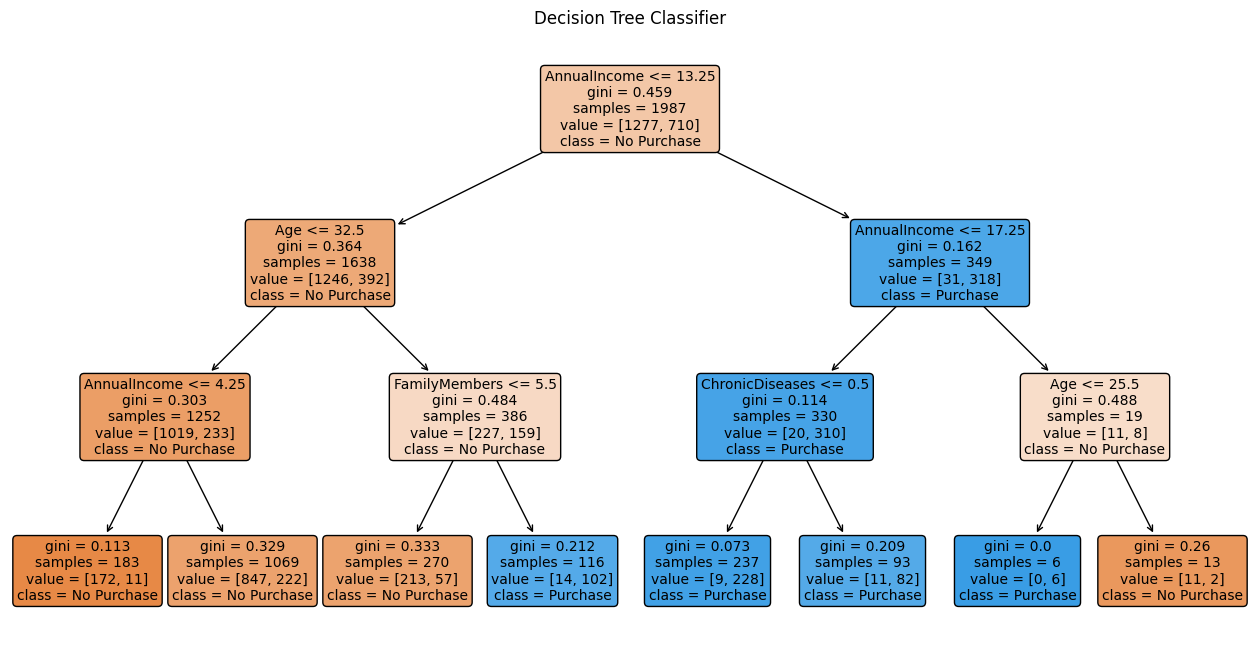

In [ ]:
# classification tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=603)
classifier.fit(X_transformed, y)
feature_names = (['Age', 'AnnualIncome', 'ChronicDiseases', 'FamilyMembers'] +
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out()))

# visualized the tree
plt.figure(figsize=(16, 8))
plot_tree(classifier, feature_names= feature_names, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few e

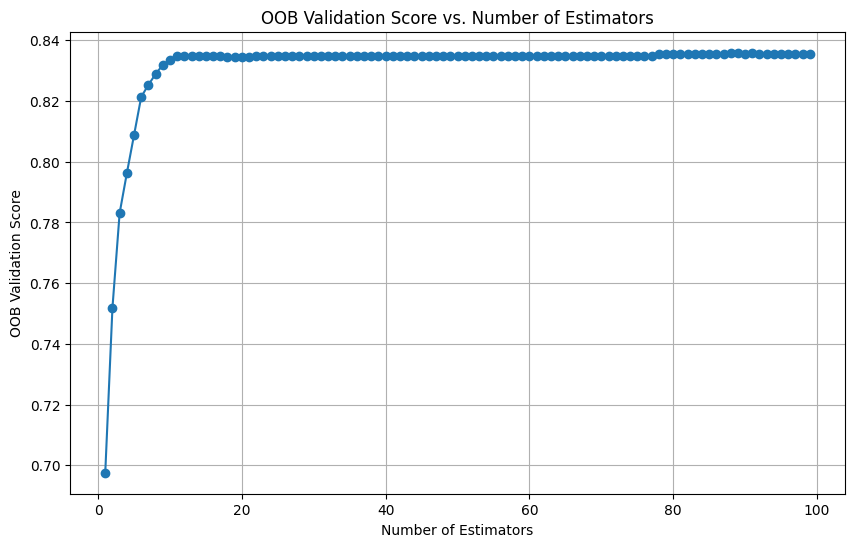

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# optimize the hyperparameter number of tree
# Create lists to store OOB scores and corresponding n_estimators values
n_estimators_values = range(1, 100)
oob_scores = []

for n_estimators in n_estimators_values:
    # Create a base DecisionTreeClassifier
    base_classifier = DecisionTreeClassifier(max_depth=3, random_state=603)

    # Create a BaggingClassifier with OOB validation
    bagged_classifier = BaggingClassifier(base_classifier, n_estimators=n_estimators, oob_score=True, random_state=603)

    # Fit the bagged classifier to the training data
    bagged_classifier.fit(X_transformed, y)

    # Access the OOB score
    oob_score = bagged_classifier.oob_score_
    oob_scores.append(oob_score)

# Plot the OOB scores vs. the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, oob_scores, marker='o', linestyle='-')
plt.title("OOB Validation Score vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("OOB Validation Score")
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few e

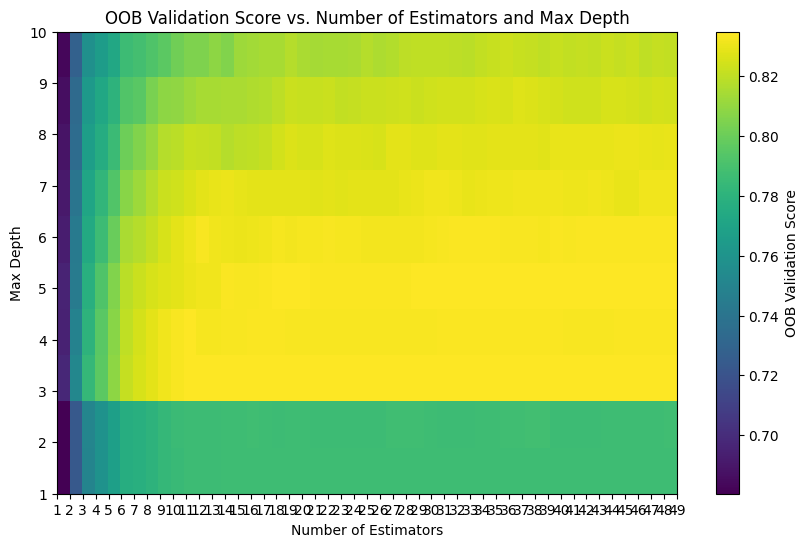

In [ ]:
# Create lists to store OOB scores and corresponding hyperparameter values
n_estimators_values = range(1, 50)
max_depth_values = range(1, 11)
oob_scores = []

for max_depth in max_depth_values:
    oob_scores_for_depth = []

    for n_estimators in n_estimators_values:
        # Create a base DecisionTreeClassifier with the current max_depth
        base_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=603)

        # Create a BaggingClassifier with OOB validation
        bagged_classifier = BaggingClassifier(base_classifier, n_estimators=n_estimators, oob_score=True, random_state=603)

        # Fit the bagged classifier
        bagged_classifier.fit(X_transformed, y)

        # Access the OOB score
        oob_score = bagged_classifier.oob_score_
        oob_scores_for_depth.append(oob_score)

    oob_scores.append(oob_scores_for_depth)

# Convert oob_scores to a numpy array for plotting
oob_scores = np.array(oob_scores)

# Plot the OOB scores as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(oob_scores, cmap='viridis', origin='lower', aspect='auto', extent=[1, 49, 1, 10])
plt.colorbar(label='OOB Validation Score')
plt.title("OOB Validation Score vs. Number of Estimators and Max Depth")
plt.xlabel("Number of Estimators")
plt.ylabel("Max Depth")
plt.xticks(range(1, 50))
plt.yticks(range(1, 11))
plt.grid(False)
plt.show()

In [ ]:
# To add hyperparameter search for max_depth and n_estimators, use GridSearchCV from sklearn.
# Use  GridSearchCV from sklearn to try out all combinations of the provided hyperparameter values and cross-validate the results to identify the best hyperparameters.
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [30, 31, 32,33,34,35,36,37,38,39,40],
    'max_depth': [None, 4, 5, 6],
}

# Initialize the RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=603, oob_score=True)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object
grid_search.fit(X_transformed, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters:\n{best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# If you want to use the best model later on:
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best hyperparameters:
{'max_depth': 6, 'n_estimators': 30}
Best cross-validation score: 0.8329


#  Optimal n_estimator: 30
#  Optimal max_depth: 6

In [ ]:
# Create and train the RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=30, max_depth=6, random_state=603, oob_score=True)
random_forest_classifier.fit(X_transformed, y)

# Access the OOB score
oob_accuracy = random_forest_classifier.oob_score_
print(f"OOB Accuracy: {oob_accuracy:.4f}")

# Get feature importances
feature_importances = random_forest_classifier.feature_importances_

# The transformed feature names might change due to one-hot encoding. So, we derive the feature names after transformation.
feature_names = (preprocessor
                 .transformers_[1][1]
                 .get_feature_names_out(['EmploymentType', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']))

# Combine original numerical feature names and new one-hot encoded names
all_feature_names = np.concatenate([['Age', 'AnnualIncome', 'ChronicDiseases', 'FamilyMembers'], feature_names])

# Print feature importances
for feature, importance in zip(all_feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")



OOB Accuracy: 0.8259
Age: 0.1583
AnnualIncome: 0.4557
ChronicDiseases: 0.0123
FamilyMembers: 0.0848
EmploymentType_Private Sector/Self Employed: 0.0222
GraduateOrNot_Yes: 0.0164
FrequentFlyer_Yes: 0.0421
EverTravelledAbroad_Yes: 0.2082


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# predicting using random forest
y_pred = random_forest_classifier.predict(X_transformed)  # random forest give binary prediction

# Creating the confusion matrix
# need to compare to choice in the validation set
cm = confusion_matrix(y, y_pred)

# Formatting the confusion matrix as a table
confusion_df = pd.DataFrame(cm, columns=['Predicted No_purchase', 'Predicted Purchase'], index=['Actual No_purchase', 'Actual Purchase'])

print("Confusion Matrix:")
print(confusion_df)
print(classification_report(y, y_pred) )

Confusion Matrix:
                    Predicted No_purchase  Predicted Purchase
Actual No_purchase                   1248                  29
Actual Purchase                       288                 422
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1277
           1       0.94      0.59      0.73       710

    accuracy                           0.84      1987
   macro avg       0.87      0.79      0.81      1987
weighted avg       0.86      0.84      0.83      1987



In [ ]:
gross_profit = 403 * 0.22
cost_per_lead = 29
gross_profit

88.66

In [ ]:
travel_insurance['TravelInsurance']. value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
travel_insurance['predicted_TravelInsurance'] = (y_pred >= 0.5).astype(int)

travel_insurance['predicted_TravelInsurance'].value_counts()

0    1536
1     451
Name: predicted_TravelInsurance, dtype: int64

In [ ]:
# Ideal gross profit if doing nothing
total_profit = (gross_profit) * 710

print("Total profit: $", total_profit)

Total profit: $ 62948.6


In [ ]:
# Strategy 1: targeting the top 50% of customers based on their predicted purchase probability.
travel_insurance_sorted = travel_insurance.sort_values(by='predicted_TravelInsurance', ascending=False)
top_50_percent_customers = travel_insurance_sorted.head(993)

# Financial figures
Number_of_buyers= sum(top_50_percent_customers['TravelInsurance'] == 1)
total_profit = Number_of_buyers * gross_profit  - 993 * cost_per_lead

# Print the results
print("Number of customers who actually buy:", Number_of_buyers)
print("Total profit: $", total_profit)

Number of customers who actually buy: 536
Total profit: $ 18724.759999999995


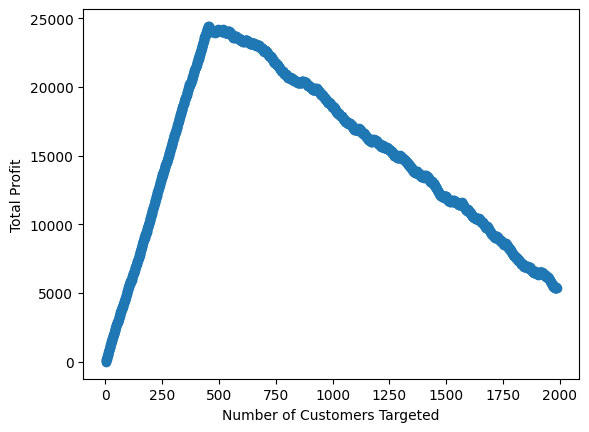

In [ ]:
# Strategy 2: run a predictive model and send ads to the top customers by the probability of buying to maximize profit
total_profits = []
# Assuming you have variables for the gross margin per purchase and the cost per brochure
for k in range(1, len(travel_insurance_sorted) + 1):
    # Select the top k customers by predicted purchase probability
    top_k_customers = travel_insurance_sorted.head(k)
    # Calculate profit from top k customers
    # Gross profit from actual purchases minus the cost of sending brochures
    profit_top_k = sum(top_k_customers['TravelInsurance'] == 1) * gross_profit - k * cost_per_lead
    # Append the total profit to the list
    total_profits.append(profit_top_k)
# Plot
x = range(1, len(travel_insurance_sorted) + 1)
plt.plot(x, total_profits, marker='o', linestyle='-')
plt.xlabel('Number of Customers Targeted')
plt.ylabel('Total Profit')
plt.show()

In [ ]:
# Show the maximized profit and number of leads
max_profits = max(total_profits)
optimal_k =  total_profits.index(max(total_profits))
print("Number of customers targeted", optimal_k)
optimal_top_k_customers = travel_insurance_sorted.head(optimal_k)
actual_buyers_at_max_profit = sum(optimal_top_k_customers['TravelInsurance'] == 1)
print(actual_buyers_at_max_profit)
print("Total profit", max_profits)

Number of customers targeted 452
423
Total profit 24454.839999999997
